In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from subprocess import call
sys.path.append('../')
from package_global_functions import *
latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)

In [23]:
pis, qs = [0.1, 0.1], [5.0, 10.0]
# ci_kwargs = [0, ]
ci_kwargs = [1, 0.5, 10.0]
ls = np.arange(0.0, 1.0, 0.04)
# ls = np.arange(0.0,0.9,0.1)

# ls_close = np.arange(0.22,0.)

# ls_small = np.arange(0.005,0.225+0.005,0.005)
# ls_mid = np.arange(0.225+1e-5, 0.3, 1e-5)
# ls_large = np.arange(0.3,1.0,0.05)
# ls = np.concatenate([ls_small, ls_mid, ls_large])

pichainExec = ','.join([str(pi) for pi in pis]) 
qchainExec = ','.join([str(q) for q in qs])
ci_kwargs_chainExec = ','.join([str(cikw) for cikw in ci_kwargs])

# ls = [0.1, 0.3, 0.8]


sols = {'lower':[[],[],[]], 'mid':[[],[],[]], 'upper':[[],[],[]]}
for l in ls:
    call(f'python model_sols.py -pis {pichainExec} -qs {qchainExec} -l {l} -lci 1.0 -ci_kwargs {ci_kwargs_chainExec} > sols.dat', shell=True)
    solsdf = pd.read_csv(f'sols.dat', names=['f0', 'f1', 'f2'], header=None, sep='\s+')
    solsdf = solsdf.sort_values(by=['f2'])
    if len(solsdf) == 3:
        iterKeys = enumerate(sols.keys())
    elif len(solsdf) == 1:
        iterKeys = enumerate(['mid', ])
    for i,k in iterKeys:
        for j in range(3):
            sols[k][j].append(solsdf[f'f{j}'].iloc[i])
    
    
    # for sol_label in solsdf['sol_label']:
    #     if not sol_label in sols.keys():
    #         sols[sol_label] = [[], [], []]
    #     for i in range(3):
    #         sols[sol_label][i].append(solsdf.query('sol_label ==  @sol_label')[f'f{i}'].iloc[0])
    

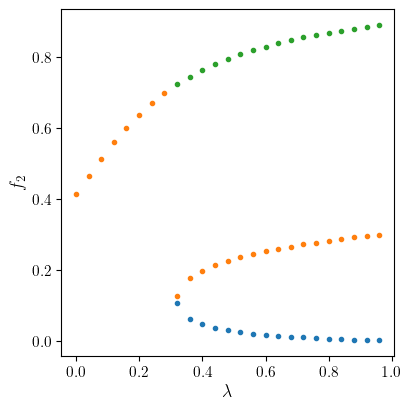

In [24]:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=f'$\lambda$', ylabel=f'$f_2$')

# for sol_label,fs in sols.items():
#     numls = len(fs[2])
#     lsAux = ls[len(ls)-numls:]
#     ax.plot(lsAux, fs[2])

# for sol_id,fs in sols_ordered.items():
#     ax.plot(ls[len(ls)-len(fs[2]):], fs[2], marker='.', lw=0)

for sol_id,fs in sols.items():
    ax.plot(ls[len(ls)-len(fs[2]):], fs[2], marker='.', lw=0)

In [14]:
sols['upper'][2]

[nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [16]:
solsdf

,sol_label,f0,f1,f2
0,0.143311,0.853694,0.002995,NaN
1,0.129847,0.002643,0.867510,NaN
2,1.057522,-0.028978,-0.028543,NaN
